# Finding Heavy Traffic Indicators on I-94

This project is about analysing a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of analysis is to determine a few indicators of heavy traffic on I-94 which can be weather type, time of the day, time of the week, etc.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data and Initial Analysis

In [2]:
traffic_volume_data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

First five rows:

In [3]:
traffic_volume_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Last five rows:

In [4]:
traffic_volume_data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


Displaying Information

In [5]:
traffic_volume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Exploring Data

Histogram plot and description for traffic_volume column:

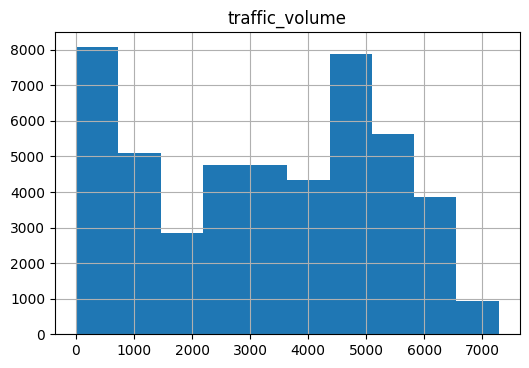

In [6]:
%matplotlib inline
traffic_volume_data.hist('traffic_volume')
plt.plot()
plt.show()

In [7]:
traffic_volume_data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Histogram seems to be bimodal with two peaks at ranges 0-800 and 4500-5100. And there seems to be a repititive pattern. As per describe method, mean traffic volume count is 3259, minimum is 1193 and maximum is 7280 while median count is 3380. Its rare to find traffic volume more than 7000.

I think daytime and nighttime can be influencing the traffic volume.

We'll be dividing the dataset into two parts:
Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)


In [8]:
traffic_volume_data['date_time']=pd.to_datetime(traffic_volume_data['date_time'])

In [9]:
traffic_volume_data['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [10]:
daytime_data=traffic_volume_data[(traffic_volume_data['date_time'].dt.hour >=7) & (traffic_volume_data['date_time'].dt.hour <19)]
nighttime_data=traffic_volume_data[(traffic_volume_data['date_time'].dt.hour  <7) | (traffic_volume_data['date_time'].dt.hour >=19)]

Analyzing Traffic Volume with respect to Day and Night time.

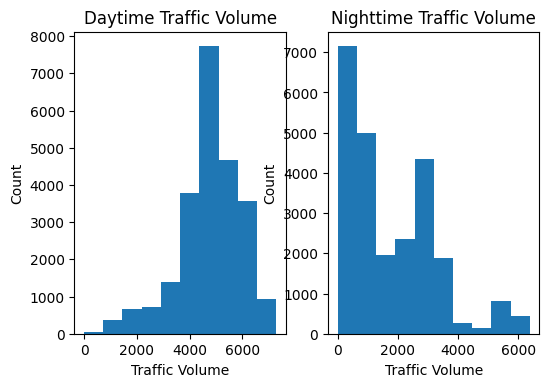

In [11]:
plt.grid((2,4))
plt.subplot(1,2,1)
plt.hist(daytime_data['traffic_volume'])
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.hist(nighttime_data['traffic_volume'])
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Count')

plt.show()

In [12]:
daytime_data['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
nighttime_data['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Traffic volume at day time is left skewed and at night time it is right skewed, less traffic is more frequent during night and more traffic is more frequent during day. We can observe it through description also.
During day 4820 count is median while during night it is 1287. 

Since traffic is less at night we can leave that data and continue with day time day as we are interested in finding indicators of heavy traffic,

Analysing Daytime data

In [14]:
daytime_data['month'] = daytime_data['date_time'].dt.month
by_month = daytime_data.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-14-51b386012796>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

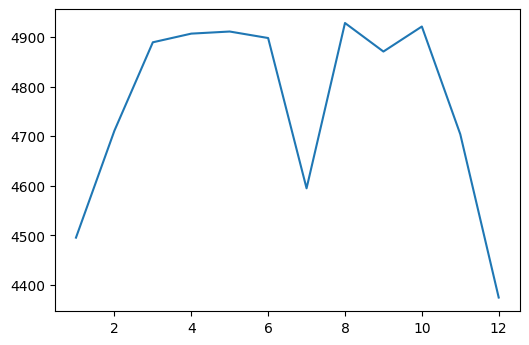

In [15]:
plt.plot(by_month['traffic_volume'])

Traffic volume seems to be increasing from Jan to April. Then it remains constant till June and then it decreases sharply till July and then it increases till August. It decreases again from October to December.

There a sharp dip during July which seems like an exception.

In [16]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_dayofweek = daytime_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

<ipython-input-16-992001dd6e86>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

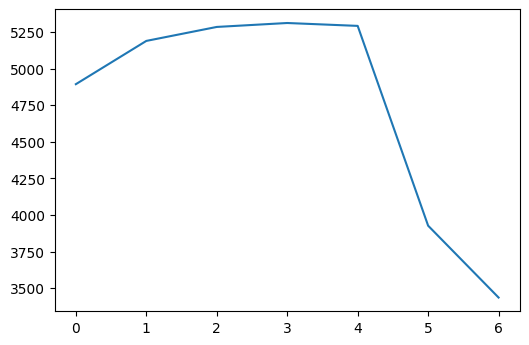

In [17]:
plt.plot(by_dayofweek['traffic_volume'])

Traffic seems to be high during weekdays and very low during weekend.

This could be because weekend is holiday. And People drive to work during weekdays

In [18]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
bussiness_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-18-0c28ffb3c7c4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



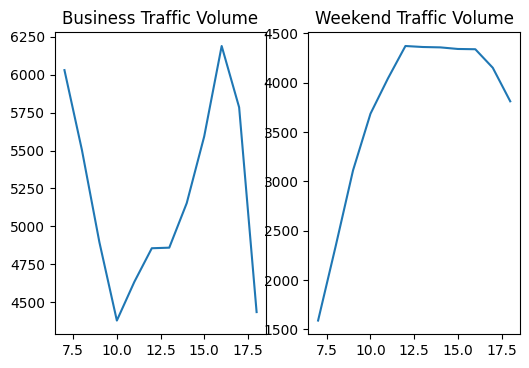

In [19]:
plt.grid((2,4))
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Business Traffic Volume')

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekend Traffic Volume')
 

plt.show()

During business days, 7 morning is the max traffic volume hour and the traffic volume deceases sharply, its lowest at 10. Then it increases and it is  max at 16 evening. This could be explained as people could be going to work/school during morning and returning at evevning.
During weekend, peak hour is 11 as people might be going out after 10 to enjoy their weekends. And at 7 traffic is least during weekend. But overall weekend days do not seems to have high traffic. Its low to moderate while during business days its moderate to very high.

Looking at correlation between traffic volume and weather

In [20]:
weather_cols=daytime_data[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description']]

In [21]:
weather_cols.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,288.28,0.0,0.0,40,Clouds,scattered clouds
1,289.36,0.0,0.0,75,Clouds,broken clouds
2,289.58,0.0,0.0,90,Clouds,overcast clouds
3,290.13,0.0,0.0,90,Clouds,overcast clouds
4,291.14,0.0,0.0,75,Clouds,broken clouds


In [22]:
weather_cols.corrwith(daytime_data['traffic_volume'])

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
dtype: float64

No moderate to strong correlation is found.

In [23]:
by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_description = daytime_data.groupby('weather_description').mean()

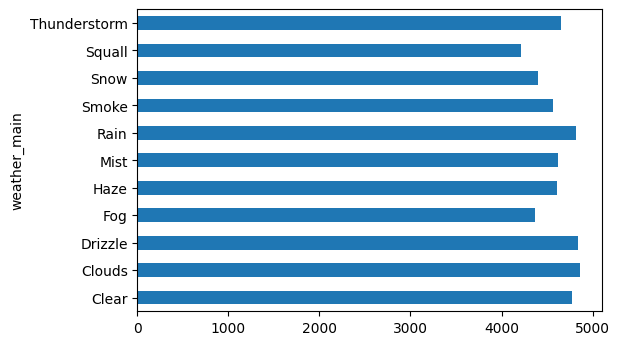

In [24]:
by_weather_main['traffic_volume'].plot.barh()

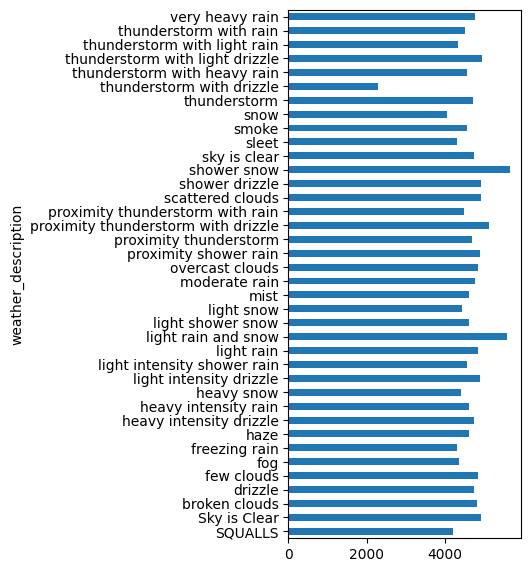

In [26]:
by_weather_description['traffic_volume'].plot.barh(figsize=(3,7))

Light rain and snow and clear sky are two condition where traffic volume exceeds 5000 cars.

## Conclusion

In conclusion certain months, week days and hours seems to be most indicating of traffic volume. Summer months, business days and 7AM or 4PM hours indicate very high traffic volume. While winter months, weekends, normal hours are low on traffic. Two weather conditions light rain and snow and clear sky also indicate moderately high traffic. But we can observe heaviest traffic during summer, business day while going or returning office time that is 7AM or 4PM. Weather conditions are not strongly indicating of traffic.